In [11]:
#Kmeans clustering algorithm
# 1. Choose k centroids at random
# 2. ASssign each point to its closest centroid (euclidean distance)
# 3. Re-compute centroids to be average of each cluster

# repeat steps 2 and 3 until clusters are stable
# todays features: slimy kill humans
# friday preview: catchphrase, cluster based on text instead of numbers

In [12]:
import pandas as pd
import json
import numpy as np
import scipy.spatial.distance as ssd

In [13]:
#read json file into a dataframe
df = pd.read_json("aliens.json")
df.head()

,results
0,"{'name': 'stitch', 'slimy': 1, 'kill humans': ..."
1,"{'name': 'E.T.', 'slimy': 2, 'kill humans': 1,..."
2,"{'name': 'Harvester', 'slimy': 9, 'kill humans..."
3,"{'name': 'kang', 'slimy': 10, 'kill humans': 8..."
4,"{'name': 'kodos', 'slimy': 10, 'kill humans': ..."


In [14]:
#normalize the json data so we have 1 column per feature
df = pd.json_normalize(df["results"])
df.head()

,name,slimy,kill humans,catchphrase
0,stitch,1.0,2.0,ohana means family family means no one is left...
1,E.T.,2.0,1.0,E.T. phone home!
2,Harvester,9.0,10.0,I would like to conquer your planet
3,kang,10.0,8.0,Go ahead! Throw your vote away!
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!"


<Axes: xlabel='slimy', ylabel='kill humans'>

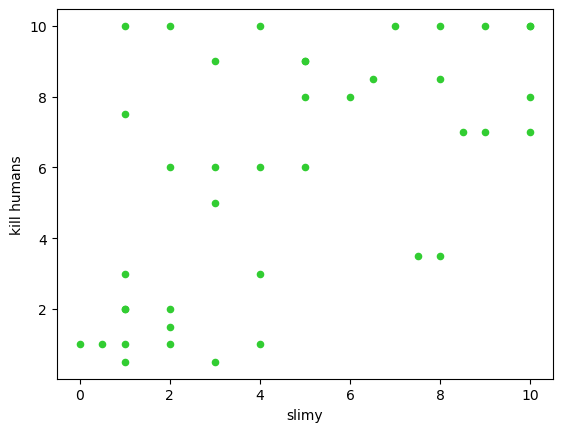

In [15]:
#plot the data
df.plot(kind = "scatter", x = "slimy", y = "kill humans", color = "limegreen")

In [16]:
#pick centroids at random
k = 2 
centroids = df.sample(2)
centroids

,name,slimy,kill humans,catchphrase
36,Paul,2.0,1.5,"To you I am an alien, yes"
34,The Thing,10.0,10.0,"Shift shape, kill things"


In [17]:
#assign each point to its closest centroid
#centroid 0 = first random sample, centroid 1 = 2nd random sample
centroid_assignments = []
for i in range(len(df)):
    min_dist = float("inf")
    min_centroid = -1
    curr_point = df.iloc[i][["slimy", "kill humans"]]
    for j in range(len(centroids)):
        curr_centroid = df.iloc[j][["slimy", "kill humans"]]
        dist = ssd.euclidean(curr_point, curr_centroid)
        if dist < min_dist:
            min_dist = dist
            min_centroid = j
    centroid_assignments.append(min_centroid)
centroid_assignments

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0]

In [21]:
df["cluster"] = centroid_assignments
df.head(10)

,name,slimy,kill humans,catchphrase,cluster
0,stitch,1.0,2.0,ohana means family family means no one is left...,0
1,E.T.,2.0,1.0,E.T. phone home!,1
2,Harvester,9.0,10.0,I would like to conquer your planet,0
3,kang,10.0,8.0,Go ahead! Throw your vote away!,1
4,kodos,10.0,7.0,"Eat, Simpsons! Grow large with food!",1
5,Audrey II,5.0,9.0,I'm just a mean green mother from outer space ...,0
6,Marvin,3.0,6.0,Where's the kaboom? There was supposed to be a...,0
7,Rocky,1.0,1.0,"Hey, your face is leaking! I haven't seen that...",0
8,Barsoomus invadus,5.0,8.0,Don't run! We are your friends!,0
9,Queller,7.5,3.5,grrr! argh!,1


<Axes: xlabel='slimy', ylabel='kill humans'>

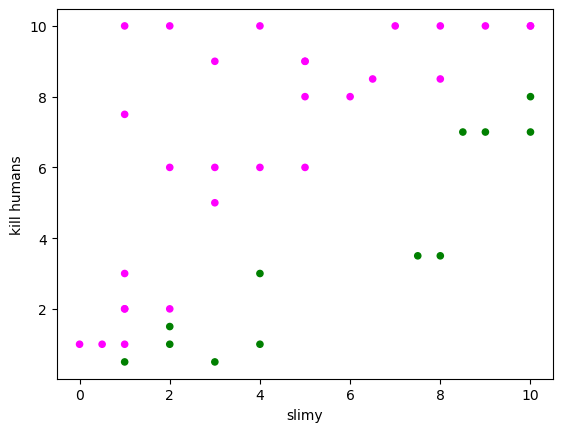

In [22]:
#plot the 2 clusters, how did they turn out?
df["color"] = np.where(df["cluster"]==0, "magenta", "green")
df.plot(kind = "scatter", x = "slimy", y = "kill humans", c = "color")